In [1]:
import whisper

model = whisper.load_model("./whisper-models/tiny.pt")

In [2]:
import pytube

# Sample YouTube Video
# https://www.youtube.com/watch?v=yYt_psQXvEM

def download_audio(url):
    # Reading the above Taken movie Youtube link
    data = pytube.YouTube(url)
    # Converting and downloading as 'MP4' file
    audio = data.streams.get_audio_only()
    file_name = audio.download(output_path="audios/")
    print("Audio Downloaded ", file_name)
    return file_name

In [14]:
from IPython.display import YouTubeVideo
from urllib.parse import urlparse
from urllib.parse import parse_qs

video_id="yYt_psQXvEM"

def display_video(url):
    # https://www.youtube.com/watch?v=yYt_psQXvEM
    global video_id
    parsed_url = urlparse(url)
    video_id = parse_qs(parsed_url.query)['v'][0]
    print(video_id)
    

PDMIFXW5QB0
Audio Downloaded  /Users/vaannadurai/reporting/kbase/llm-experiments/audios/Colossal sea monster unearthed in UK - BBC News.mp4
Speech Recognition started..


In [11]:
import gradio as gr

def generate_transcription(url):
    display_video(url)
    downloaded_file = download_audio(url)
    print("Speech Recognition started..")
    result = model.transcribe(downloaded_file, fp16=False)
    # print(result["text"])
    return result["text"]

demo = gr.Interface(fn=generate_transcription, inputs="text", outputs=gr.Textbox(lines=10, placeholder="Speech to text content..."))
    
if __name__ == "__main__":
    demo.launch(show_api=False)

Running on local URL:  http://127.0.0.1:7871

To create a public link, set `share=True` in `launch()`.


yYt_psQXvEM


PDMIFXW5QB0


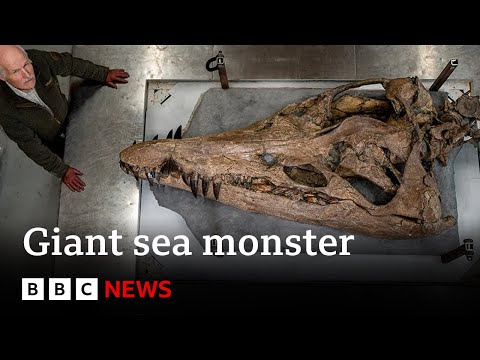

In [15]:
print(video_id)
YouTubeVideo(video_id, width=800, height=500)